In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
from tqdm import tqdm


# Analizing training set

In [2]:
csvpathtrain = '/kaggle/input/rsna-breast-cancer-detection/train.csv'

dftrain = pd.read_csv(csvpathtrain)
dftrain.head()


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [3]:
dftrain.tail()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True
54705,1,9989,439796429,R,CC,60.0,0,0,0,0.0,0,C,216,True


In [4]:
# Seaborn setup
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})


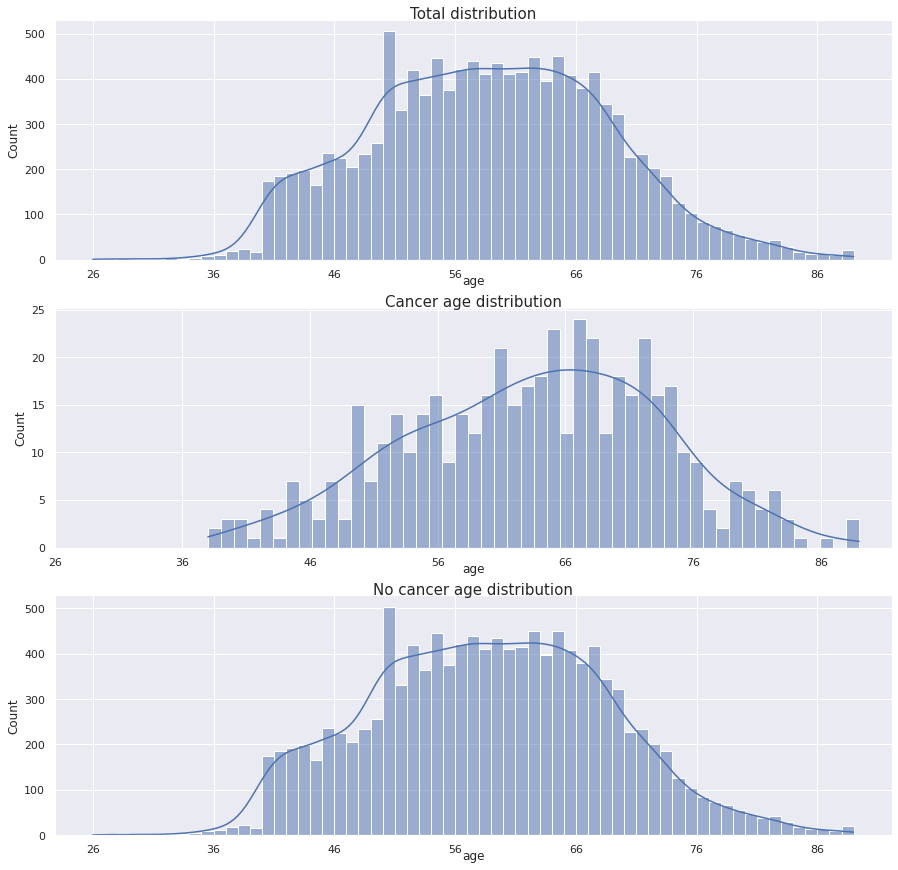

In [5]:
ages = dftrain.groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
ages_cancer = dftrain[dftrain['cancer'] == 1].groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
ages_no_cancer = dftrain[dftrain['cancer'] == 0].groupby('patient_id')['age'].apply(lambda x: x.unique()[0])

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
xticks = range(int(dftrain['age'].min()), int(dftrain['age'].max()), 10)

splot = sns.histplot(ax = axes[0], x = ages, bins = ages.nunique(), kde = True, palette = "crest")
axes[0].xaxis.labelpad = -5
splot.set_title("Total distribution", fontsize = 15, y = 0.98)
splot.set_xticks(xticks)

splot = sns.histplot(ax = axes[1], x = ages_cancer, bins = ages_cancer.nunique(), kde = True)
axes[1].xaxis.labelpad = -5
splot.set_title("Cancer age distribution", fontsize = 15, y = 0.98)
splot.set_xticks(xticks) 

splot = sns.histplot(ax = axes[2], x = ages_no_cancer, bins = ages_no_cancer.nunique(), kde = True)
axes[2].xaxis.labelpad = -5
splot.set_title("No cancer age distribution", fontsize = 15, y = 0.98)
splot.set_xticks(xticks) 

plt.show()
# for some reason, in set_xticks, 0 is referenced as starting tick (in this case 26)

Age distribution is normal (Gaussian) distribution, which is exepected.

Age distribution is also much different for examples with and without cancer. There is more older people with cancer, out of which most of them are older than 40.

Text(0.5, 1.0, 'View distribution')

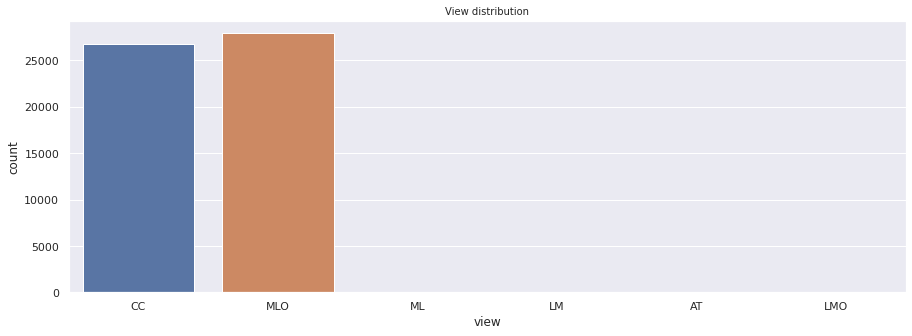

In [6]:

# plotting view
splot = sns.countplot(x = dftrain['view'])
splot.set_title("View distribution", fontsize = 10)

It would be interesting to see if there are any view class examples that are not CC and MLO.

In [7]:
dftrain['view'][(dftrain['view'] != "CC") & (dftrain['view'] != "MLO")]

2010      ML
4736      ML
4785      LM
8479      LM
8483      LM
9609      AT
11941     LM
14339     AT
14343     AT
15529     AT
15538     AT
18854     AT
18985     AT
20254    LMO
22411     AT
22415     AT
22875     ML
22879     ML
25120     AT
25123     AT
26887     AT
28329     LM
28334     LM
28416     ML
28419     ML
28874     LM
28877     LM
29663     AT
29702     AT
29704     AT
31144     AT
33083     ML
37675     LM
38069     LM
42767     AT
45132     ML
50649     AT
52400     AT
Name: view, dtype: object

Since there are couple of examples, and from previous histogram can't be seen how many, it will be shown on seperate histogram.

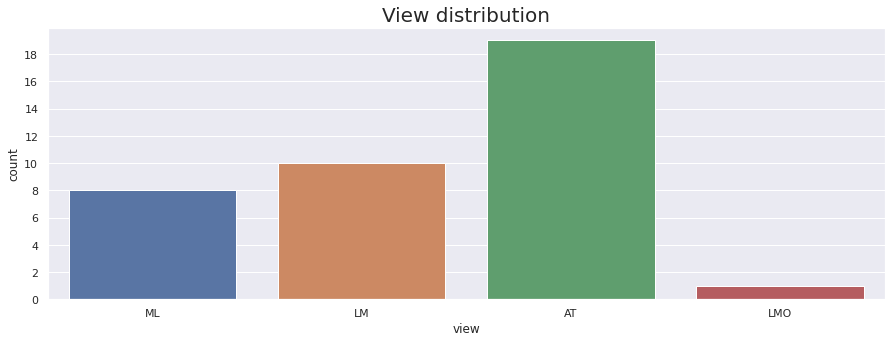

In [8]:
splot = sns.countplot(x = dftrain['view'][(dftrain['view'] != "CC") & (dftrain['view'] != "MLO")])
sns.set(rc={'figure.figsize':(9,5)})
splot.set_title("View distribution", fontsize = 20)
splot.set_yticks(range(0, 20, 2)) 

Very big imbalance here! Just one example of LMO, and ~25000 of CC and MLO. Alsto ML, LM and AT are very underrepresented.

([<matplotlib.patches.Wedge at 0x7fab364e9b50>,
 [Text(-1.0960454828357369, 0.09318958930790816, '0'),
  Text(1.0960454795638466, -0.09318962779010191, '1')],
 [Text(-0.5978429906376745, 0.05083068507704081, '97.3%'),
  Text(0.5978429888530071, -0.050830706067328306, '2.7%')])

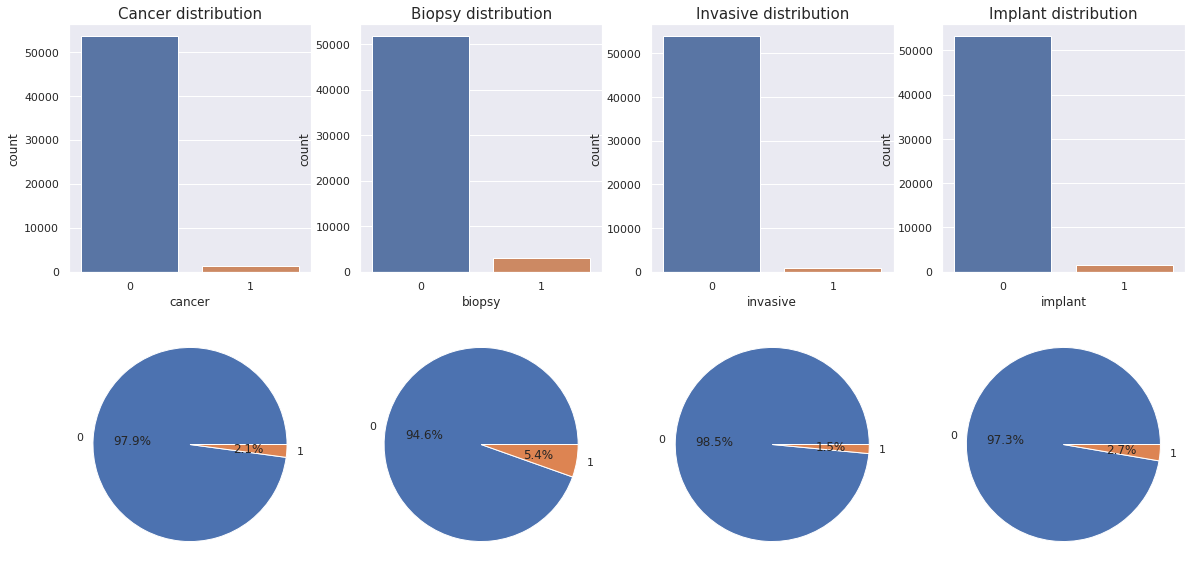

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

########## PLOTING CANCER ################
splot = sns.countplot(ax = axes[0, 0], x = dftrain['cancer'])
splot.set_title("Cancer distribution", fontsize = 15)

s = dftrain['cancer'].value_counts()
axes[1, 0].pie(s, autopct="%.1f%%", labels = s.keys())

########## PLOTING BIOPSY ################
splot = sns.countplot(ax = axes[0, 1], x = dftrain['biopsy'])
splot.set_title("Biopsy distribution", fontsize = 15)

s = dftrain['biopsy'].value_counts()
axes[1, 1].pie(s, autopct="%.1f%%", labels = s.keys())

########## PLOTING INVASIVE ################
splot = sns.countplot(ax = axes[0, 2], x = dftrain['invasive'])
splot.set_title("Invasive distribution", fontsize = 15)

s = dftrain['invasive'].value_counts()
axes[1, 2].pie(s, autopct="%.1f%%", labels = s.keys())

########## PLOTING IMPLANT ################
splot = sns.countplot(ax = axes[0, 3], x = dftrain['implant'])
splot.set_title("Implant distribution", fontsize = 15)

s = dftrain['implant'].value_counts()
axes[1, 3].pie(s, autopct="%.1f%%", labels = s.keys())


## Analyze this!

([<matplotlib.patches.Wedge at 0x7fab36420c90>,
 [Text(0.24237166378863317, 1.0729659717774511, 'B'),
  Text(-0.7230258980575544, -0.8289955070674793, 'C'),
  Text(0.8695800349493449, -0.6736694759431336, 'A'),
  Text(1.085229169683701, -0.17965981539460796, 'D')],
 [Text(0.1322027257028908, 0.5852541664240641, '42.9%'),
  Text(-0.39437776257684776, -0.4521793674913523, '41.3%'),
  Text(0.4743163826996426, -0.36745607778716377, '10.5%'),
  Text(0.5919431834638369, -0.09799626294251342, '5.2%')])

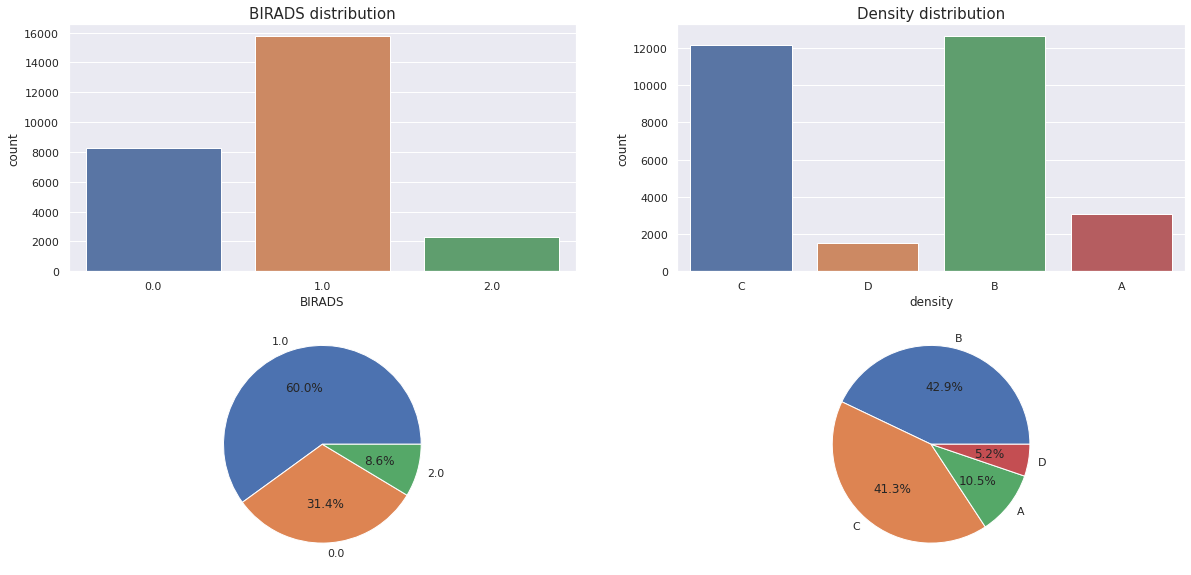

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

########## PLOTING BIRADS ################
splot = sns.countplot(ax = axes[0, 0], x = dftrain['BIRADS'].dropna())
splot.set_title("BIRADS distribution", fontsize = 15)

s = dftrain['BIRADS'].dropna().value_counts()
axes[1, 0].pie(s, autopct="%.1f%%", labels = s.keys())

########## PLOTING DENSITY ################
splot = sns.countplot(ax = axes[0, 1], x = dftrain['density'].dropna())
splot.set_title("Density distribution", fontsize = 15)

s = dftrain['density'].dropna().value_counts()
axes[1, 1].pie(s, autopct="%.1f%%", labels = s.keys())

Text(0.5, 1.0, 'Machines distribution')

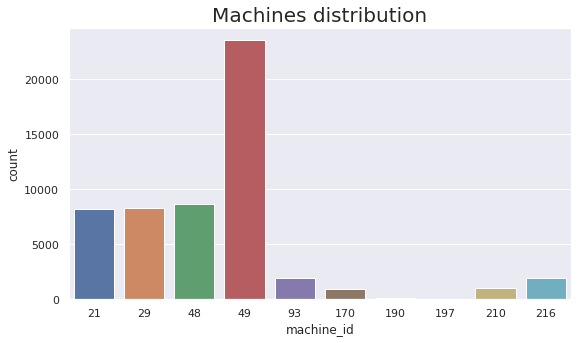

In [11]:
splot = sns.countplot(x = dftrain['machine_id'])
sns.set(rc={'figure.figsize':(9,5)})
splot.set_title("Machines distribution", fontsize = 20)

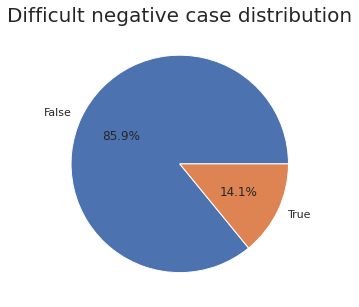

In [12]:
s = dftrain['difficult_negative_case'].dropna().value_counts()
plt.pie(s, autopct="%.1f%%", labels = s.keys())
plt.title("Difficult negative case distribution", fontsize=20);
plt.show()

In [13]:
dftrain.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

For age, 37/54705 data are missing, so it's not much of a problem, But for atrubutes BIRADS and density, missing values are approximatly 1/2 of a dataset, so some predictor should be used to fill these missing values. For density prediction, all listed atributes should be used (except image id) + image for data sample.

density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.
<br/>
BIRADS atribute is 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.

In [14]:
dftrain['patient_id'].nunique

<bound method IndexOpsMixin.nunique of 0        10006
1        10006
2        10006
3        10006
4        10011
         ...  
54701     9973
54702     9989
54703     9989
54704     9989
54705     9989
Name: patient_id, Length: 54706, dtype: int64>

There are totally of 10006 unique patients, and for them there is totally 54701 data.

# Test data analysis

In [15]:
csvpathtest = '/kaggle/input/rsna-breast-cancer-detection/test.csv'

dftest = pd.read_csv(csvpathtest)
dftest.head()


,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


This is example of test data. The image will be provided, as well as the following attributes:
* laterality
* view
* age
* implant
* machine_id
<br/>
prediction_id just is just patient_id and laterality merged, so I don't see any use of this atribute.
<br/>
Atributes that just provided for training data are:
* density
* cancer (THIS IS TARGET)
* biopsy
* invasive
* BIRADS
* difficult_negative_case


First idea is to train clasificators for each atribute that is provided just for training data, to predict it from image. 
After that, create clasificator that predicts out of all this atributes, weather person has a cancer or not.

# Image analysis

In [16]:
# load first 1000 images 
dirname = '/kaggle/input/rsna-breast-cancer-256-pngs'
imgs = []
img_ids = []


i = 0
for dirname, _, filenames in os.walk(dirname):
    for filename in tqdm(filenames):
        if filename.endswith(".png"):
            # new resize because of memory issue when converting from uint8 to float
            img = PIL.Image.open(dirname + "/" + filename)
            
            img = np.array(img) / 255.0 # resacling and converting to float
            imgs.append(img)
            
            img_id = filename.split(sep = ".")[0].split(sep = "_")[1]
            img_ids.append(int(img_id))
            
            
        if i > 1000:
            break
        i += 1
        
imgs = np.array(imgs)

  2%|▏         | 1001/54706 [00:07<06:31, 137.04it/s]


In [17]:
labels = np.array([dftrain.loc[dftrain['image_id'] == img_id]['implant'].values for img_id in img_ids])[:, 0]

Text(0.5, 0.98, 'With implant')

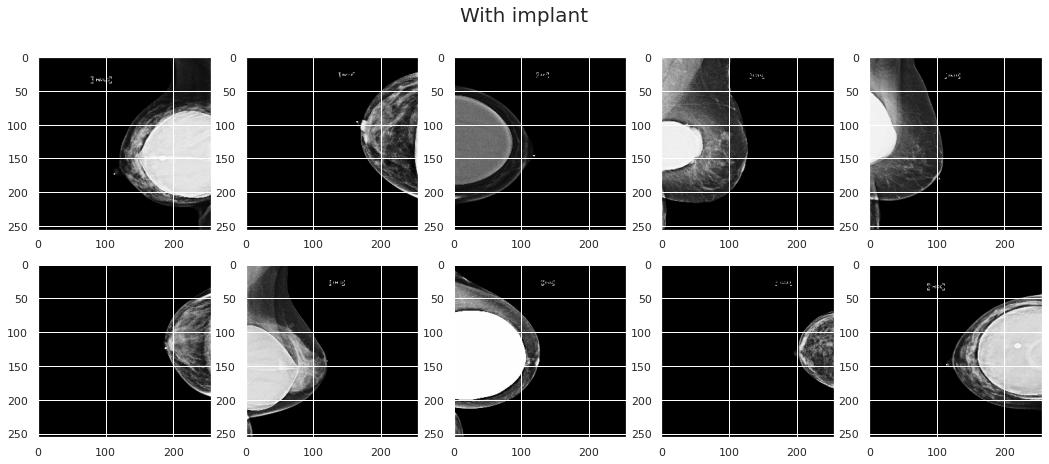

In [18]:
img_implants_inds = np.squeeze(np.argwhere(labels == 1))

f = plt.figure(figsize=(18,7))
for i in range(10):
    implant1 = img_implants_inds[i]
    imp_example = imgs[implant1]

    plt.subplot(2, 5, i + 1)
    plt.imshow(imp_example, cmap = 'gray')
f.suptitle("With implant", fontsize = 20)

In [19]:
labels = np.array([dftrain.loc[dftrain['image_id'] == img_id]['cancer'].values for img_id in img_ids])[:, 0]

Text(0.5, 0.98, 'With cancer')

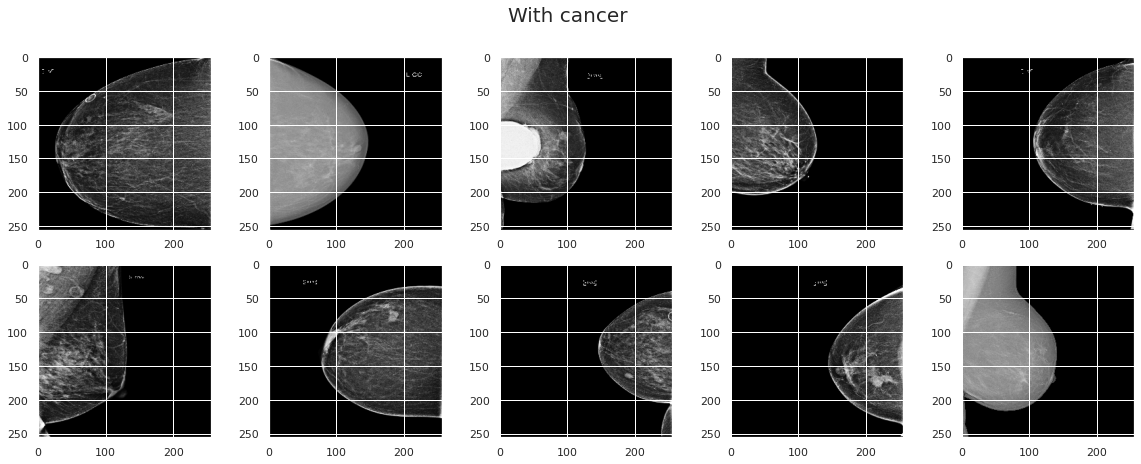

In [20]:
img_cancer = np.squeeze(np.argwhere(labels == 1))

f = plt.figure(figsize=(20,7))
for i in range(10):
    implant1 = img_cancer[i]
    imp_example = imgs[implant1]

    plt.subplot(2, 5, i + 1)
    plt.imshow(imp_example, cmap = 'gray')
f.suptitle("With cancer", fontsize = 20)

Text(0.5, 0.98, 'Without cancer')

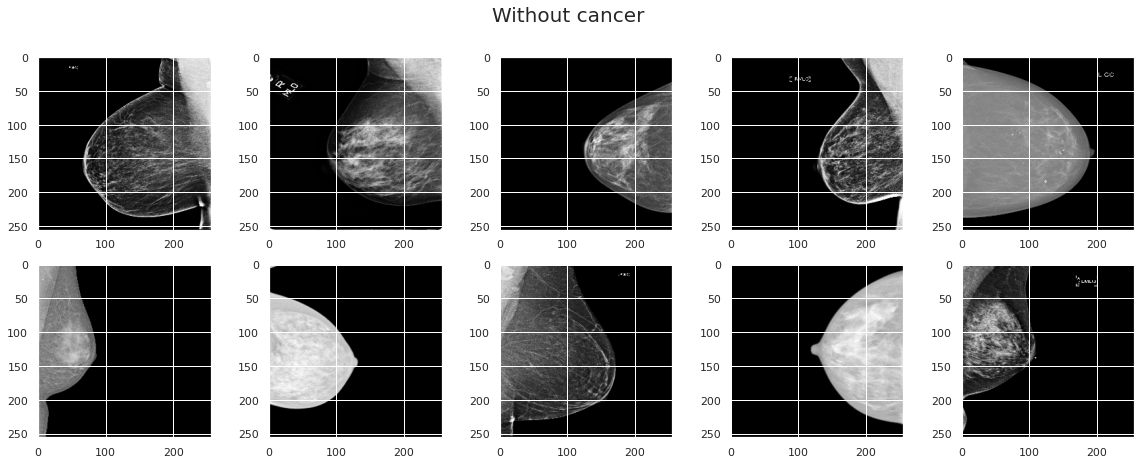

In [21]:
img_not_cancer = np.squeeze(np.argwhere(labels == 0))

f = plt.figure(figsize=(20,7))
for i in range(10):
    implant1 = img_not_cancer[i]
    imp_example = imgs[implant1]

    plt.subplot(2, 5, i + 1)
    plt.imshow(imp_example, cmap = 'gray')
f.suptitle("Without cancer", fontsize = 20)

### Plot the pixel histograms for first 10 images

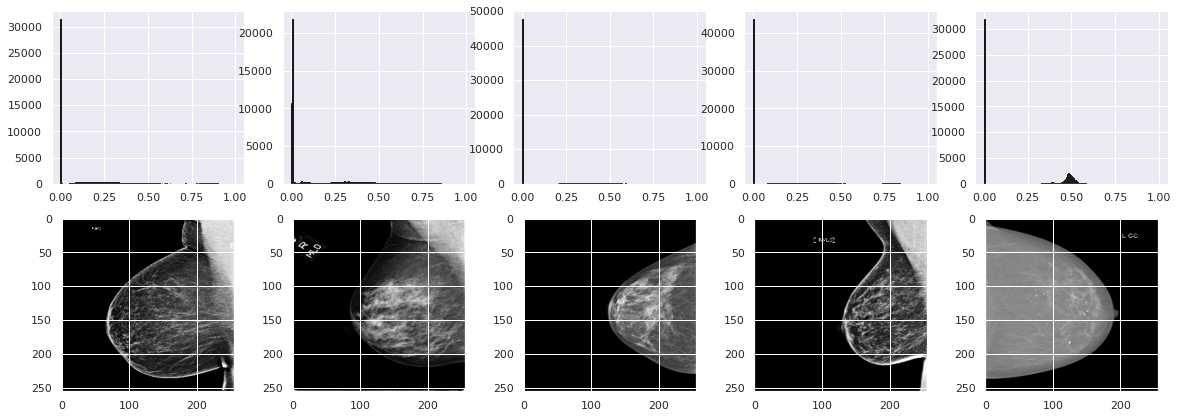

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(20,7))

for i in range(5):
    img_example = imgs[i]
    plt.subplot(2, 5, i + 1)
    plt.hist(img_example.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') 
    plt.subplot(2, 5, i + 6)
    plt.imshow(img_example, cmap = 'gray')

Since the most pixels are black, and can't be seen the distribution of other pixels, those black pixels whose value is 0, will be left out

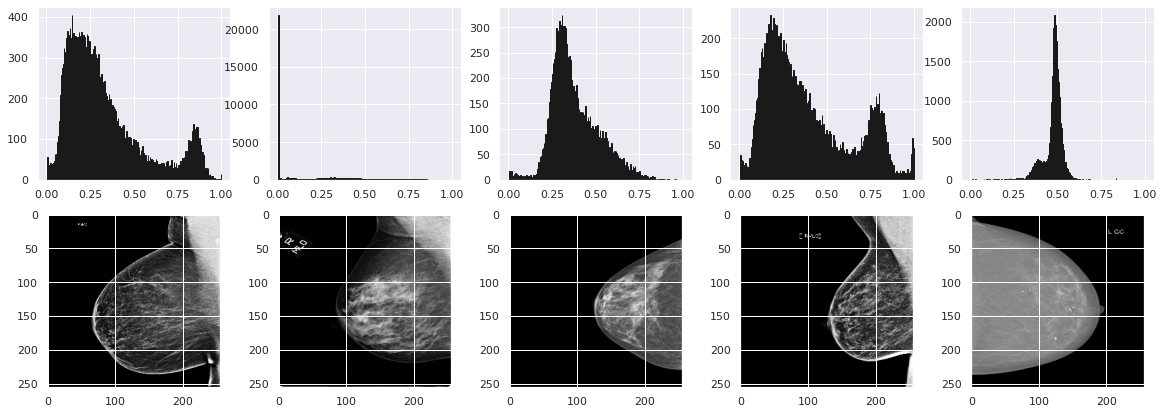

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(20,7))

for i in range(5):
    img_example = imgs[i]
    plt.subplot(2, 5, i + 1)
    plt.hist(img_example[img_example > 0.0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') 
    plt.subplot(2, 5, i + 6)
    plt.imshow(img_example, cmap = 'gray')

Distributions vary very much, which can be from the fact that images are taken with different machines!<br>Now will be analyzed how machine id will infulence pixel distribution. <br> 
From previous analysis, it is seen that most of the images are taken with machines 28, 29, 48 and 49, so the pixel distribution for them will be analysed. 

In [24]:
labels = np.array([dftrain.loc[dftrain['image_id'] == img_id]['machine_id'].values for img_id in img_ids])[:, 0]

unique_machines = np.unique(labels)
print(f"There is {len(unique_machines)} different mahine ids.")

There is 10 different mahine ids.


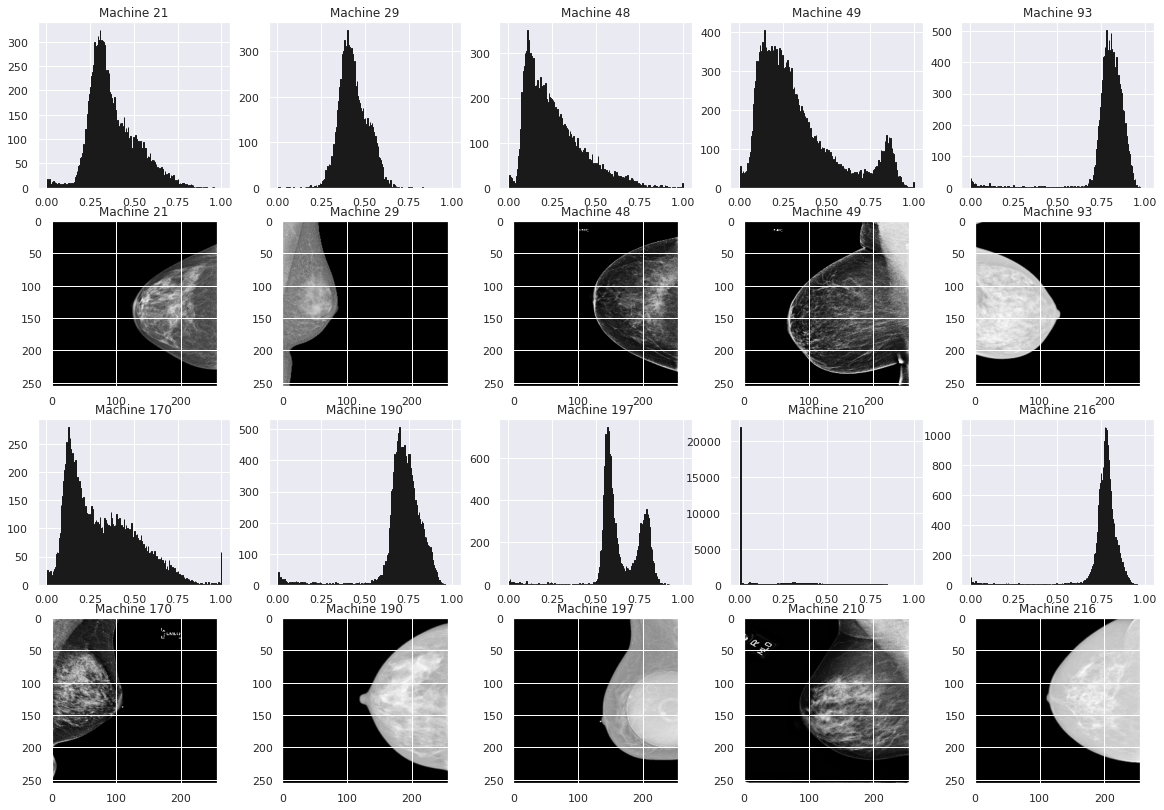

In [25]:
fig, axes = plt.subplots(4, 5, figsize=(20,14))

for i in range(len(unique_machines)):
    img_for_machine = imgs[np.squeeze(np.argwhere(labels == unique_machines[i])[0])] # taking first image for machine
    plt.subplot(4, 5, i + 1 if i < 5 else i + 6)
    plt.hist(img_for_machine[img_for_machine > 0.0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') 
    plt.title(f"Machine {unique_machines[i]}")
    plt.subplot(4, 5, i + 6 if i < 5 else i + 11)
    plt.imshow(img_for_machine, cmap = 'gray')
    plt.title(f"Machine {unique_machines[i]}")




These images that are very bright when you exclude background (machines 93, 190, 197 and 216) seems that doesn't capture tissue density very well, and that could be problematic for cancer detection. <br>
On the other hand, other machines shots looks good. The general conclusion is that the more histogram is shifted to left, the better (because white pixels will represent regions of interest, and they will be more easily noticed since there will be more dark pixels).
<br>
Luckily, most images are taken with first 4 machines, which have fairly good quality (machine 29 is a bit problematic).


In [26]:
corr = dftrain.corr(method='kendall')

<AxesSubplot:>

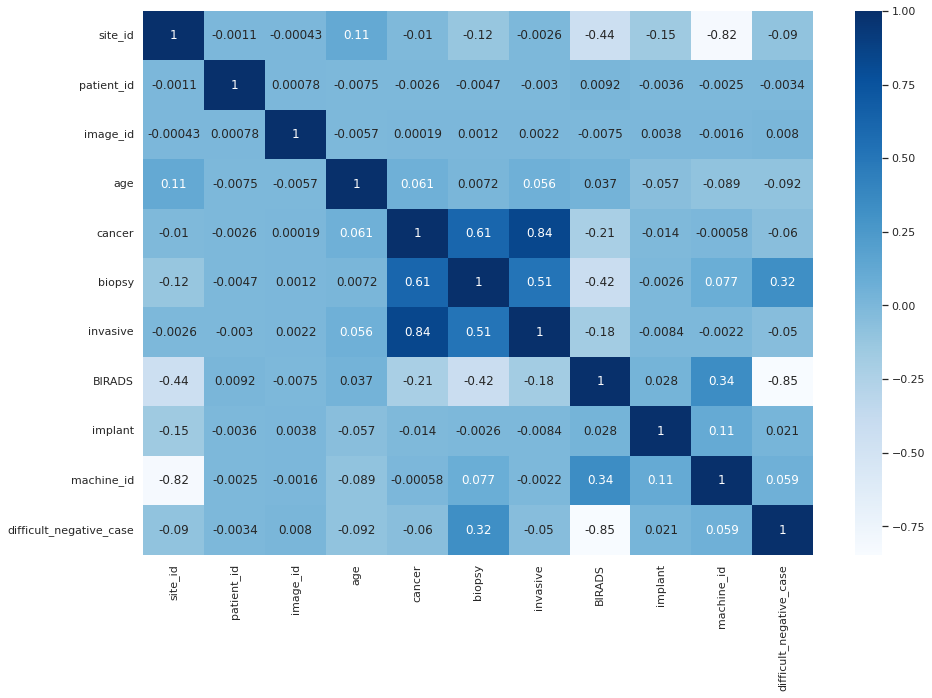

In [27]:
plt.figure(figsize = (15, 10))
sns.heatmap(corr, cmap = 'Blues', annot = True)

In [28]:
abs(corr['cancer']) > 0.01

site_id                    False
patient_id                 False
image_id                   False
age                         True
cancer                      True
biopsy                      True
invasive                    True
BIRADS                      True
implant                     True
machine_id                 False
difficult_negative_case     True
Name: cancer, dtype: bool

From this, we can se that there is no correlation between having cancer and site id, patient id, image id and machine id. <br>
The other, personal features, are more correlated with cancer. Biopsy and invasive are strongly correlated, which makes sense from descriptions of these features. Age has a positive correlation, which also makes sense, since the older persons have higher probability of having a cancer. On the other hand, implant has small negative correlation, which would mean that having an implant kind of prevents cancer better than not having an implant. That absolutly makes no sense to me, and this is probably some kind of coincidence.

So, to sumarize, from features given in test.csv there is only sense to use age information, and maybe view and laterality, which are categorical variables and as such are not represented in correlation matrix.